# House price prediction

Rows, cols: (200, 2)

First 5 rows:
   Size_sqft  Price_USD
0       3674     718427
1       1360     277939
2       1794     360634
3       1630     324047
4       1595     325105

Summary stats:
         Size_sqft      Price_USD
count   200.000000     200.000000
mean   2333.775000  465557.050000
std     992.421831  198256.316633
min     521.000000   85836.000000
25%    1519.000000  294462.750000
50%    2372.000000  465033.500000
75%    3229.500000  645251.750000
max    3999.000000  811766.000000

Missing values per column:
Size_sqft    0
Price_USD    0
dtype: int64


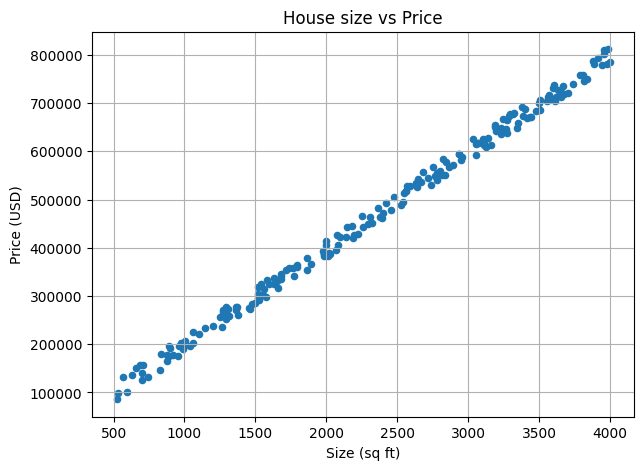

In [4]:
# Step 1 — Load & inspect
import pandas as pd
import matplotlib.pyplot as plt

# 1. Load
df = pd.read_csv("house_price_simple.csv")

# 2. Quick peek
print("Rows, cols:", df.shape)
print("\nFirst 5 rows:")
print(df.head())

# 3. Summary stats
print("\nSummary stats:")
print(df.describe())

# 4. Check for missing values
print("\nMissing values per column:")
print(df.isnull().sum())

# 5. Simple scatter plot (Size vs Price)
plt.figure(figsize=(7,5))
plt.scatter(df["Size_sqft"], df["Price_USD"], s=20)
plt.xlabel("Size (sq ft)")
plt.ylabel("Price (USD)")
plt.title("House size vs Price")
plt.grid(True)
plt.show()


In [5]:
import numpy as np

# Shuffle the data first (so it’s not in order)
shuffled_df = df.sample(frac=1, random_state=42).reset_index(drop=True)

# Convert columns to numpy arrays
X = shuffled_df["Size_sqft"].values
y = shuffled_df["Price_USD"].values

# Manual 80/20 split
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

print("Train samples:", len(X_train))
print("Test samples:", len(X_test))


Train samples: 160
Test samples: 40


In [6]:
import numpy as np

# Function to compute predictions
def predict(X, w, b):
    return w * X + b

# Function to compute cost (mean squared error)
def compute_cost(X, y, w, b):
    m = len(X)
    predictions = predict(X, w, b)
    cost = (1 / (2 * m)) * np.sum((predictions - y) ** 2)
    return cost


In [7]:
def compute_gradient(X, y, w, b):
    m = len(X)
    predictions = predict(X, w, b)
    dw = (1 / m) * np.sum((predictions - y) * X)
    db = (1 / m) * np.sum(predictions - y)
    return dw, db

def gradient_descent(X, y, w, b, alpha, iterations):
    cost_history = []
    for i in range(iterations):
        dw, db = compute_gradient(X, y, w, b)
        w -= alpha * dw
        b -= alpha * db
        cost = compute_cost(X, y, w, b)
        cost_history.append(cost)
        if i % 100 == 0:
            print(f"Iteration {i}: Cost={cost:.2f}, w={w:.4f}, b={b:.4f}")
    return w, b, cost_history


In [8]:
# initialize parameters
w = 0
b = 0
alpha = 0.0000001   # learning rate (tiny, because prices are large)
iterations = 1000

# train the model
w_final, b_final, cost_history = gradient_descent(X_train, y_train, w, b, alpha, iterations)

print(f"\nTraining complete! 🚀")
print(f"Final parameters: w = {w_final:.4f}, b = {b_final:.4f}")
print(f"Final cost = {cost_history[-1]:.4f}")


Iteration 0: Cost=16038600281.61, w=129.3838, b=0.0467
Iteration 100: Cost=71797570.34, w=199.5661, b=0.0708
Iteration 200: Cost=71797570.19, w=199.5661, b=0.0695
Iteration 300: Cost=71797570.04, w=199.5661, b=0.0683
Iteration 400: Cost=71797569.89, w=199.5661, b=0.0671
Iteration 500: Cost=71797569.73, w=199.5661, b=0.0659
Iteration 600: Cost=71797569.58, w=199.5661, b=0.0646
Iteration 700: Cost=71797569.43, w=199.5661, b=0.0634
Iteration 800: Cost=71797569.28, w=199.5661, b=0.0622
Iteration 900: Cost=71797569.13, w=199.5661, b=0.0609

Training complete! 🚀
Final parameters: w = 199.5661, b = 0.0597
Final cost = 71797568.9790


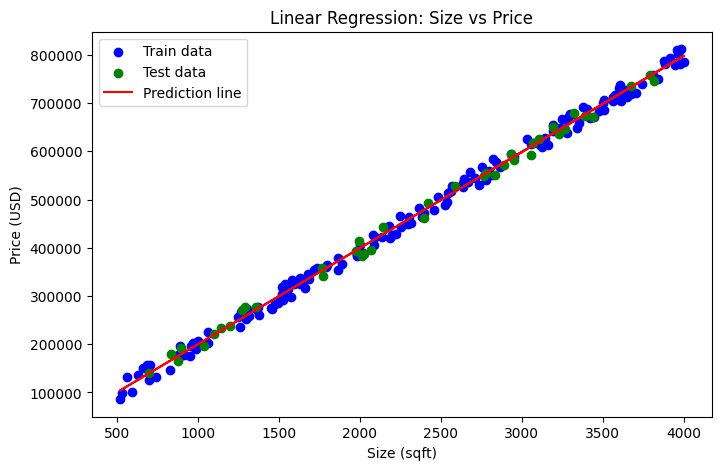

In [9]:
import matplotlib.pyplot as plt

# predictions
y_pred_train = predict(X_train, w_final, b_final)
y_pred_test = predict(X_test, w_final, b_final)

# plot
plt.figure(figsize=(8,5))
plt.scatter(X_train, y_train, color='blue', label='Train data')
plt.scatter(X_test, y_test, color='green', label='Test data')
plt.plot(X_train, y_pred_train, color='red', label='Prediction line')
plt.xlabel('Size (sqft)')
plt.ylabel('Price (USD)')
plt.legend()
plt.title('Linear Regression: Size vs Price')
plt.show()


In [10]:
def evaluate_model(y_true, y_pred):
    mae = np.mean(np.abs(y_true - y_pred))
    rmse = np.sqrt(np.mean((y_true - y_pred)**2))
    return mae, rmse

mae_train, rmse_train = evaluate_model(y_train, y_pred_train)
mae_test, rmse_test = evaluate_model(y_test, y_pred_test)

print(f"Train MAE: {mae_train:.2f}, RMSE: {rmse_train:.2f}")
print(f"Test MAE: {mae_test:.2f}, RMSE: {rmse_test:.2f}")


Train MAE: 10495.60, RMSE: 11983.12
Test MAE: 9716.90, RMSE: 11337.32
